In [1]:
import re
from collections import Counter, defaultdict
from typing import Dict, Iterable, List, Tuple

import ipywidgets as widgets
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from ipywidgets import interact

# Чтение данных

## Общие функции

In [2]:
def has_text(message):
  return message['text']!= ''

In [3]:
import json

def extract_text(message):    
    result = ''
    for token in message['text']:
        if isinstance(token, dict):
            result += token['text']
        elif isinstance(token, str):
            result += token
    return result.strip()

def has_content(text, length = 5):
    return len(text.split()) >= length

def delete_spam(text, spam_words):
    for word in spam_words:
        text = text.replace(word, "")    
    return text

def is_spam_text(text, spam_texts):
    for sequence in spam_texts:  
        if text.find(sequence) != -1:
            return True
    return False

## RT

In [4]:
file_name = 'RT.json'
data = pd.read_json(file_name)
data = data[data['messages'].apply(has_text)]['messages'].reset_index(drop=True)
texts = data.apply(extract_text).reset_index(drop=True)

In [5]:
import re

def default_processing(text):
    text = text.replace("ё", "е")
    text = re.sub(r'https?:\/\/[^\s]+', 'www.russiatomorrow.com', text)
    text = re.sub(r'russian.rt.com\/[^\s\/]+', 'www.russiatomorrow.com', text)
    text = re.sub(r'@[^\s]+', '@russiatomorrow', text)
    text = re.sub(r'[«»"]', '', text)
    text = text.strip(':; ')
    text = text.lstrip('.: ')
    if text[-1] not in '!?.':
        text = text+'.'
        
    return text

In [6]:
spam_words = ["@rt_russian", "🟩 Подпишись — RT на русском", "@RT_RUSSIA", "Ruptly"]
spam_texts = ["читайте в нашей подборке", "Подробнее — в видео", "Подпишись на канал", "Валентин Богданов", "ГОЛОВАНОВ", "оброе утро","обрый вечер", "в традиционной рубрике Бесит", "главные новости о", "Главные новости к"]
texts = texts.apply(lambda x: x.split("\n")).explode()
texts = texts.apply(lambda x: delete_spam(x, spam_words))
texts = texts[texts.apply(has_content)]
texts = texts[~texts.apply(lambda x: is_spam_text(x, spam_texts))]
texts = texts.apply(default_processing).reset_index(drop=True)

In [7]:
id = np.random.randint(texts.size)
print(id, texts[id], sep='\n')

293531
100-я бригада Народной милиции ЛНР прорвала линию обороны противника на Луганском направлении и продвинулась вглубь на 7 км.


In [8]:
texts1 = texts

In [9]:
list(texts1[texts1.str.find("главные новости о") != -1])

[]

## RIA

In [10]:
file_name = 'RIA.json'
data = pd.read_json(file_name)
data = data[data['messages'].apply(has_text)]['messages'].reset_index(drop=True)
texts = data.apply(extract_text).reset_index(drop=True)

In [11]:
import re

def RIA_processing(text):
    
    if text.startswith("РИА Новости"):
        letter = text.lstrip("РИА Новости")[0]
        if letter == letter.upper():
            text = text.lstrip("РИА Новости")
    text = text.replace("РИА Новости", "RussiaTomorrow")
    return text

In [12]:
spam_words = ['UPD']
spam_texts = [' / ']
texts = texts.apply(lambda x: x.split("\n")).explode()
texts = texts.apply(lambda x: delete_spam(x, spam_words))
texts = texts[texts.apply(has_content)]
texts = texts[~texts.apply(lambda x: is_spam_text(x, spam_texts))]
texts = texts.apply(default_processing).reset_index(drop=True)
texts = texts.apply(RIA_processing).reset_index(drop=True)

In [13]:
id = np.random.randint(texts.size)
print(id, texts[id], sep='\n')

251412
В Париже стартовала очередная, уже 12-я по счету акция протеста против пенсионной реформы.


In [14]:
texts2 = texts

## TASS

In [15]:
file_name = 'TASS.json'
data = pd.read_json(file_name)
data = data[data['messages'].apply(has_text)]['messages'].reset_index(drop=True)
texts = data.apply(extract_text).reset_index(drop=True)

In [16]:
spam_words = []
spam_texts = []
texts = texts.apply(lambda x: x.split("\n")).explode()
texts = texts.apply(lambda x: delete_spam(x, spam_words))
texts = texts[texts.apply(has_content)]
texts = texts[~texts.apply(lambda x: is_spam_text(x, spam_texts))]
texts = texts.apply(default_processing).reset_index(drop=True)
texts = texts.apply(lambda x: x.replace("ТАСС", "RussiaTomorrow")).reset_index(drop=True)

In [17]:
id = np.random.randint(texts.size)
print(id, texts[id], sep='\n')

253444
Памятник председателю Совета Министров СССР, дважды Герою Социалистического Труда Николаю Тихонову демонтирован в Харькове, сообщило местное издание Kharkiv today.


In [18]:
texts3 = texts

In [19]:
texts[texts.apply(lambda x: x.startswith('- '))]

7583     - Дейенерис Таргариен отправилась через море п...
7584     - Джон Сноу не только воскрес, но и победил в ...
7585     - Серсея Ланнистер взорвала Великую септу Бейл...
7586     - Арья Старк наконец-то стала никем, отомстила...
7587     - Король ночи со своим бесчисленным войском ме...
11299    - Отменяется обязательное ношение масок на ули...
11300    - Отменяются все ограничения в сфере предприни...
11301    - Компании и организации смогут самостоятельно...
11302    - Все образовательные учреждения, детские лаге...
11303    - Снимаются ограничения на работу аттракционов...
11304    - Смогут открыться театры, кинотеатры и концер...
11305    - Увеличат число зрителей на спортивных соревн...
11306    - Смогут заработать кружки и секции программы ...
Name: messages, dtype: object

In [20]:
print(list(texts[texts.str.find('ТАСС')!= -1]))

[]


## Гарри поттер

In [21]:
file_name = 'HP1RUS.TXT'
with open(file_name, 'r') as file:
    text = file.read()
texts = text.split('. ')
for i in range(len(texts)):
    texts[i] = texts[i].replace("\n", "")
texts = [text for text in texts if 5 < len(text)]

texts4 = texts

## Сборка

In [22]:
texts1.size + texts2.size + texts3.size + len(texts4) 

1038031

In [23]:
texts = pd.concat([texts1,texts2, texts3], ignore_index=True)
texts

0          Добрый день, дорогие читатели www.russiatomorr...
1          Футболисты сборной Румынии переживают за детей...
2          На меня произвело впечатление, что Россия опер...
3          На неделе выйдет полное интерьвью с Виталием М...
4          СРОЧНО: Неизвестные захватили самолет EgyptAir...
                                 ...                        
1019202    По данным ФСБ, он передавал данные о местах ди...
1019203                           Видео: УФСБ России по ЛНР.
1019204    💬💬💬 Бывший командующий армией сербов Боснии и ...
1019205    Младич также подчеркнул, что его отец всегда п...
1019206    Он в первую очередь боевой генерал, он научен ...
Name: messages, Length: 1019207, dtype: object

In [24]:
print(texts[np.random.randint(texts.size)])

Теперь наша борьба с теми же фишинговыми сайтами будет еще более простой, — отметил замглавы министерства Олег Качанов.


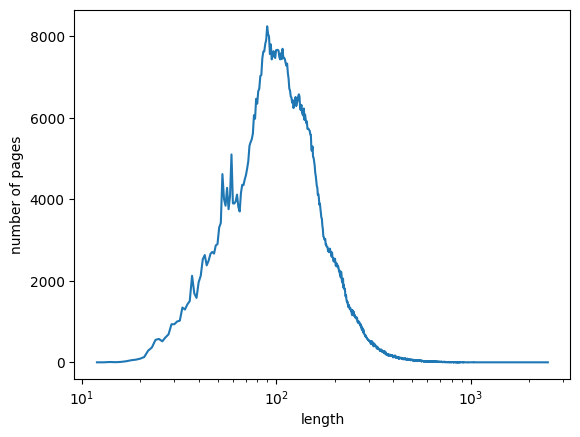

In [25]:
text_by_length = texts.str.len().value_counts().sort_index()

plt.plot(text_by_length.index, text_by_length.values)
plt.xlabel("length")
plt.ylabel("number of pages")
plt.xscale("log")

In [771]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gosha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [26]:
from nltk.tokenize import sent_tokenize, word_tokenize

def normalize_and_tokenize(text: str) -> List[str]:
    text = text.lower()
    text = re.sub('[^а-я0-9a-z,.\-?!–: ]', " ", text)
    text = re.sub(" +", " ", text).strip()
    
    text = nltk.word_tokenize(text)
    return text

tokenized_texts = texts.apply(normalize_and_tokenize).values.tolist()

In [28]:
min_len = 6
filtered_tokenized_texts = list(filter(lambda message: len(message) >= min_len, tokenized_texts))
bad_tokenized_texts = list(filter(lambda message: min_len-1 <=len(message) < min_len, tokenized_texts)) 
print(len(tokenized_texts))
print(len(filtered_tokenized_texts))

1019207
1016632


In [29]:
tokenized_texts4 =[normalize_and_tokenize(text) for text in texts4]
tokenized_texts4 = [text for text in tokenized_texts4 if 5 < len(text)]

In [30]:
filtered_tokenized_texts = filtered_tokenized_texts + tokenized_texts4

### Сохраняем токенизированные тексты для деплоя

In [31]:
import pickle
with open('filtered_tokenized_texts 5.pkl', 'wb') as f:
    pickle.dump(filtered_tokenized_texts, f)

In [32]:
# SEED = 42
# train_set, val_set = train_test_split(
#     filtered_tokenized_texts, test_size=0.9, random_state=SEED
# )

train_set = filtered_tokenized_texts

In [33]:
BOS = "<BOS>"
EOS = "<EOS>"

ngrams_config = {
    "pad_left": True,
    "pad_right": True,
    "left_pad_symbol": BOS,
    "right_pad_symbol": EOS,
}


def build_ngram_counts(
    tokenized_texts: Iterable[Iterable[str]], n: int
) -> Dict[Tuple[str, ...], Dict[str, int]]:
    """
    встречаемость слова при условии (n - 1) предыдущего слова

    для n = 2:
        {
            ('добрый',): {'день': 273, 'вечер': 55, 'путь': 8, ...},
            ('машинное',): {'масло': 2, 'отделение': 6, 'обучение': 4, ...}
            ...
        }

    для n = 3:
         {
            ('<BOS>', '<BOS>'): {'мэр': 22, 'выпуск': 40, ...},
            ('<BOS>', 'мэр'): {'москвы': 3, 'перми': 3, ...},
            ...
        }
    """

    counts = defaultdict(Counter)

    for text in tokenized_texts:
      for ngram in nltk.ngrams(text, n, **ngrams_config):
        prefix = ngram[:-1]
        token = ngram[-1]
        counts[prefix][token] += 1

    return counts

In [34]:
class LanguageModel:
    def __init__(self, tokenized_texts: Iterable[Iterable[str]], n: int) -> None:
        self.n: int = n
        self.probs: Dict[Tuple[str, ...], Dict[str, float]] = defaultdict(Counter)
        ngrams = build_ngram_counts(tokenized_texts, n)
        for prefix, distribution in ngrams.items():
            total_count = sum(distribution.values())
            self.probs[prefix] = Counter({
                token: count/ total_count for token,count in distribution.items()
            })

    def get_token_distribution(self, prefix: List[str]) -> Dict[str, float]:
        prefix = prefix[max(0, len(prefix) - self.n + 1) :]
        prefix = [BOS] * (self.n - 1 - len(prefix)) + prefix
        return self.probs[tuple(prefix)]

    def get_next_token_prob(self, prefix: List[str], token: str) -> float:
        return self.get_token_distribution(prefix)[token]

In [35]:
def get_next_token(
    lm: LanguageModel, prefix: List[str], temperature: float = 1.0
) -> str:
    """
    * получение распределения вероятностей для следующего слова при условии префикса
    * сэмплирование из полученного распределения с температурой
    """

    distribution: Dict[str, float] = lm.get_token_distribution(prefix)

    probs = [v ** (1/temperature) for v in distribution.values()]
    total_proba = sum(probs)
    scaled_probs = [p / total_proba for p in probs]
    token_array = np.random.choice(list(distribution.keys()), size = 1, p =scaled_probs)

    return token_array[0]

In [36]:
model = LanguageModel(train_set, n=4)

In [108]:
import string
import re

sentence = " ".join(normalize_and_tokenize(texts[texts.str.len()>20].iloc[np.random.randint(100000)])[:3])
temps = np.linspace(0.5,5,31)
for i in range(30):
    token = get_next_token(lm =model, prefix = sentence.split(), temperature = temps[i])   
    if token == EOS:
        break
    sentence += f' {token}'
    if token == '.' and i > 20:
        break


sentence = sentence[0].upper() + sentence[1:]
# if sentence[0] == '«':    
#     sentence = sentence[0]+sentence[1].upper() + sentence[2:]
# if sentence[-1] not in ':.!?':
#     sentence = sentence + '.'
pat = "\s+([{}]+)".format(re.escape(string.punctuation))
sentence = re.sub("\s{2,}", " ", re.sub(pat, r"\1", sentence))
sentence = sentence.replace('- ', '-')
sentence = re.sub(r'(?<=[.!?]\s)(\w)', lambda x: x.group(1).upper(), sentence)
print(sentence, end = '')
if i == 29:
    print('...')

Источники в wikileaks сообщили о переводе джулиана ассанжа в тюрьме белмарш ассанжа продержали уже более тысячи человек, выписаны 16. Накануне был выписан 4491 человек.

In [164]:
import nltk
from nltk.probability import FreqDist
sentences = texts[:20000]
words = []
for sentence in sentences:
    words.extend(nltk.word_tokenize(sentence.lower()))

fdist = FreqDist(words)

unique_words = [word for word, count in fdist.items() if count == 1]
print(len(unique_words))

33897
